In [8]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
   -O /tmp/rockpaperscissors.zip

--2020-06-04 05:18:49--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.63MB/s    in 60s     

2020-06-04 05:19:50 (5.11 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BASE_DIR = "/tmp/rockpaperscissors/rps-cv-images"
datagen = ImageDataGenerator(
                    validation_split=0.3,
                    rescale=1./255,
                    rotation_range=20,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
train_generator = datagen.flow_from_directory(
    BASE_DIR, 
    subset='training',
    target_size=(150, 100),
    batch_size=4,
    class_mode='categorical'
)
val_generator = datagen.flow_from_directory(
    BASE_DIR, 
    subset='validation',
    target_size=(150, 100),
    batch_size=4,
    class_mode='categorical'
)

Found 1533 images belonging to 3 classes.
Found 655 images belonging to 3 classes.


In [18]:
model = tf.keras.models.Sequential([
     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 100, 3)),
     tf.keras.layers.MaxPooling2D(2, 2),
     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(512, activation='relu'),
     tf.keras.layers.Dense(3, activation='softmax')
 ])
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])
model.fit(
       train_generator,
       steps_per_epoch=25,
       epochs=20,
       validation_data=val_generator,
       validation_steps=5,
       verbose=2)

Epoch 1/20
25/25 - 4s - loss: 1.1138 - accuracy: 0.3200 - val_loss: 1.0436 - val_accuracy: 0.6000
Epoch 2/20
25/25 - 4s - loss: 0.9998 - accuracy: 0.5000 - val_loss: 0.8389 - val_accuracy: 0.6000
Epoch 3/20
25/25 - 4s - loss: 0.8952 - accuracy: 0.5800 - val_loss: 0.6173 - val_accuracy: 0.7500
Epoch 4/20
25/25 - 4s - loss: 0.5265 - accuracy: 0.8200 - val_loss: 0.8062 - val_accuracy: 0.7000
Epoch 5/20
25/25 - 4s - loss: 0.5480 - accuracy: 0.7700 - val_loss: 0.4434 - val_accuracy: 0.9000
Epoch 6/20
25/25 - 4s - loss: 0.4383 - accuracy: 0.8700 - val_loss: 0.3892 - val_accuracy: 0.8000
Epoch 7/20
25/25 - 4s - loss: 0.3463 - accuracy: 0.8700 - val_loss: 0.1049 - val_accuracy: 0.9500
Epoch 8/20
25/25 - 4s - loss: 0.1531 - accuracy: 0.9588 - val_loss: 1.3809 - val_accuracy: 0.7000
Epoch 9/20
25/25 - 4s - loss: 0.3827 - accuracy: 0.8500 - val_loss: 0.2997 - val_accuracy: 0.9000
Epoch 10/20
25/25 - 4s - loss: 0.2351 - accuracy: 0.9100 - val_loss: 0.1113 - val_accuracy: 0.9000
Epoch 11/20
25/25 -

Saving 0CSaM2vL2cWX6Cay.png to 0CSaM2vL2cWX6Cay.png
0CSaM2vL2cWX6Cay.png
scissor


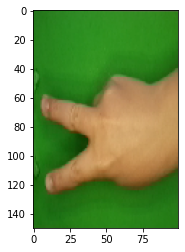

In [32]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
     
uploaded = files.upload()
     
for fn in uploaded.keys():
     
   # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
     
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
      
  print(fn)
  if classes[0][0] == 1:
    print('paper')
  elif classes[0][1] == 1:
    print('rock')
  else:
    print('scissor')